# Andox individual project planning

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
players_data <- read_csv("data/players.csv")
sessions_data <- read_csv("data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Description

In [7]:
players_data_mean <- players_data |>
    select(played_hours, Age) |>
    map_df(~mean(.x, na.rm = TRUE)) |>
    round(2)

players_data_experience_mean <- players_data |>
    select(experience, played_hours, Age) |>
    group_by(experience) |>
    summarise(across(c(played_hours, Age), mean, na.rm = TRUE)) |>
    mutate(across(where(is.numeric), ~ round(.x, 2)))

players_data_mean
players_data_experience_mean

Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `across(c(played_hours, Age), mean, na.rm = TRUE)`.
ℹ In group 1: `experience = "Amateur"`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


played_hours,Age
<dbl>,<dbl>
5.85,21.14


experience,played_hours,Age
<chr>,<dbl>,<dbl>
Amateur,6.02,21.37
Beginner,1.25,21.66
Pro,2.60,16.92
Regular,18.21,22.03
Veteran,0.65,20.96


In the data set `players.csv`, there are 196 rows and 7 columns. 4 *character*  variables (`experience`, `hashedEmail`, `name`, `gender`), 2 *double-precision*  variables (`played_hours`, `Age`), and 1 *logical*  variable (`subscribe`). The average value of `played_hours` and `Age` are 5.85 hours and 21.14 years old, respectively. After grouping players according to their `experience`, we can see that regular players played the most and have the highest average age, with an average of 18.21 hours played and 22.03 years old.

The data set has several *NA*  data points. It is important to use the `na.rm = TRUE` code to ignore these data points. Also, the data set contains some unnecessary data, like players' Email and their names. These are unique information about each player that would not contribute to creating any trends and relations to other variables. Other than that, changing the *character*  variables into *factor*  variables might also help with data wrangling and graphing. 

In [15]:
sessions_data_mean <- sessions_data |>
    select(original_start_time, original_end_time) |>
    map_df(~mean(.x, na.rm = TRUE)) 

sessions_data_mean

original_start_time,original_end_time
<dbl>,<dbl>
1.719201e+12,1.719196e+12


In the data set `sessions.csv`, there are 1535 rows and 5 columns. 3 *character* variables (`hashedEmail`, `start_time`, `end_time`), and 2 *double-precision* variables (`original_start_time`, `original_end_time`). The average value of `original_start_time` and `original_end_time` are 1.719201e+12 (June 24 2024 13:10) and  1.719196e+12 (June 21 2024 22:26), respectively. The data in this data set cannot be used directly. First, `hashedEmail` cannot show any relation with other variables. Other than that, `start_time`, `end_time` and `original_start_time`, `original_end_time` represent the same information but in different formats. Values in `start_time` `end_time` columns are not tidy as they show 2 separate variables, date and time. Also, variables in `original_start_time`, `original_end_time` are not in a format that is easy for humans to read. 

It is important to tidy up the data and also use the `na.rm = TRUE` code to ignore any *NA* data points.  

## Question

One broad question that I will address is *What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?*
And the specific question that I have formulated is *Can `Age` and `experience` predict `played_hours` in players.csv?*

For this question above, only using `players.csv` would be sufficient. We can first select variables we are interested in (`Age`, `played_hours`, and `experience`). After that, we can plot our data into a scatter plot to visualize our data with `Age` and `played_hours` on our x and y axis while `experience` as our fill colour. But we have to first convert our `experience` variable into a *function* variable to do so. Then we can determine whether we should use knn-regression or linear regression to predict `played_hours` from `Age` and `experience`.

## Exploratory Data Analysis and Visualization

In [4]:
players_data_mean <- players_data |>
    select(played_hours, Age) |>
    map_df(~mean(.x, na.rm = TRUE)) |>
    round(2)

players_data_experience_mean <- players_data |>
    select(experience, played_hours, Age) |>
    group_by(experience) |>
    summarise(across(c(played_hours, Age), mean, na.rm = TRUE)) |>
    mutate(across(where(is.numeric), ~ round(.x, 2)))

players_data_mean
players_data_experience_mean

Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `across(c(played_hours, Age), mean, na.rm = TRUE)`.
ℹ In group 1: `experience = "Amateur"`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


played_hours,Age
<dbl>,<dbl>
5.85,21.14


experience,played_hours,Age
<chr>,<dbl>,<dbl>
Amateur,6.02,21.37
Beginner,1.25,21.66
Pro,2.60,16.92
Regular,18.21,22.03
Veteran,0.65,20.96


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


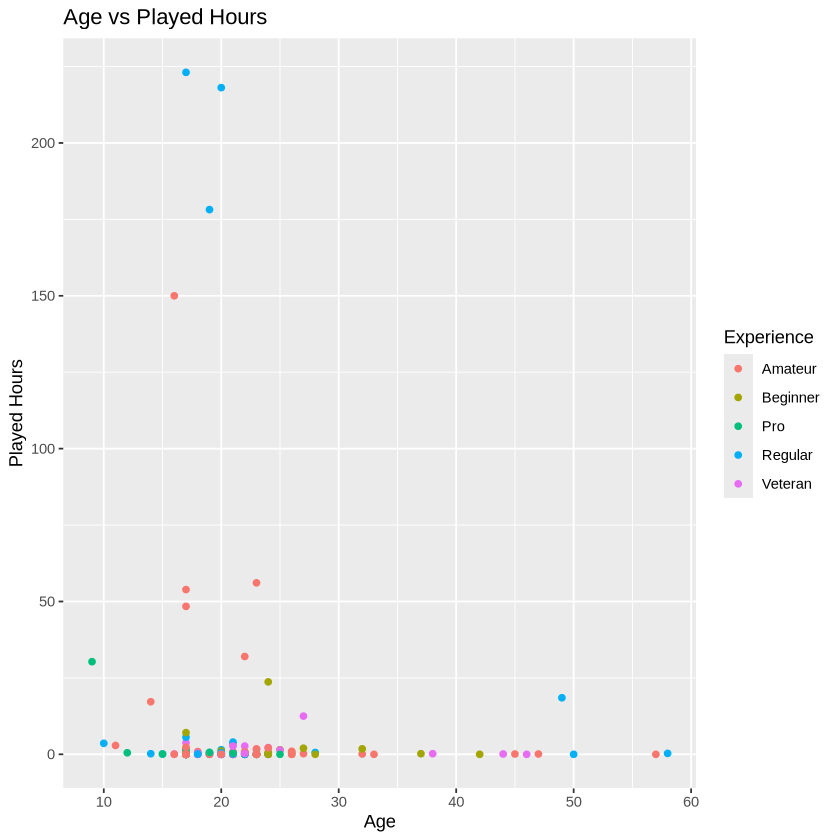

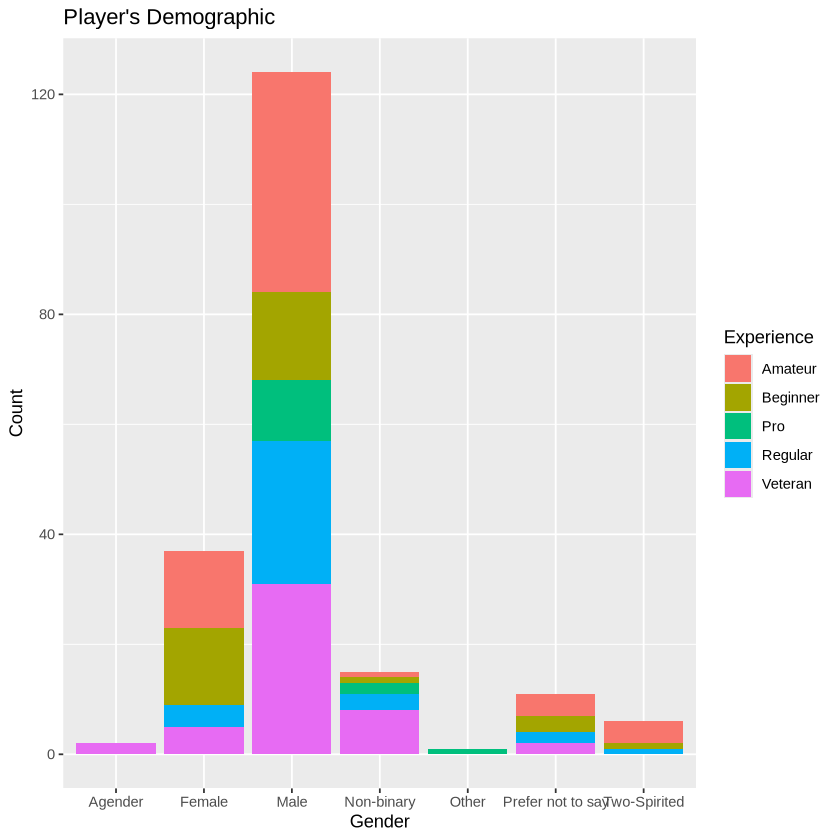

In [15]:
players_data_format <- players_data |>
    mutate(experience = as.factor(experience)) |>
    mutate(gender = as.factor(gender))

players_plot1 <- players_data_format |>
    ggplot(aes(x = Age, y = played_hours, colour = experience)) +
    geom_point() +
    labs(x = "Age" ,
         y = "Played Hours" ,
         colour = "Experience" ,
         title = "Age vs Played Hours")

players_plot2 <- players_data_format |>
    ggplot(aes(x = gender, fill = experience)) +
    geom_bar() +
    labs(x = "Gender" ,
         y = "Count" ,
         fill = "Experience" ,
         title = "Player's Demographic")
         
players_plot1
players_plot2

From the first graph, there is no direct relationship between age and played hours. So knn-regression would be a more ideal method in predicting played hours.
In the second graph, we can know that the players are mostly males. 

## Methods and Plan

I propose to use knn-regression for the above question. The method is appropriate because the data does not show any linearity, making it more flexible in predicting results. The most important assumption is that all predictors are compared on a comparable scale, so standardizing the data is important. Limitations include uneven distribution of data points and inappropriate K values. 
I will first standardize the data and split it into 80% training and 20% testing. In the training data, use a 5-fold cross-validation to find the K value with the lowest RMSPE. Then use the selected K value to predict played_hours.  


## GitHub

Link: https://github.com/capybaraox/project-individual-planning-stage-